# GEC Data Science Program
## Level 1, Labs 4 & 5

Contents

#### [Lab  4](#Lab-4)
- [Classification](#Classification)
- [Evaluation](#Evaluation)
- [ROC Curve](#ROC-curve)
- [Clustering](#Clustering)

#### [Lab  5](#Lab-5)
- [Feature-Selection](#Feature-Selection)
- [Model-Selection](#Model-Selection)
- [Parameter-Tuning](#Parameter-Tuning)
- [Pipeline](#Pipeline)

### Imports

In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import model_selection, linear_model

In [2]:
from sklearn import svm, model_selection, metrics

In [3]:
%matplotlib inline

### Data Loading

In [4]:
data_path="../../GEC/IntroLevel/titanic/"
d = pd.read_csv(data_path+"train_clean.csv", index_col=0)

In [6]:
d.head()

,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Age,Survived
PassengerId,,,,,,,,,,
1,0.432550,-0.473408,-0.879247,1.0,0.0,1.0,0.0,1.0,22.0,0
2,0.432550,-0.473408,1.360456,0.0,0.0,0.0,0.0,0.0,38.0,1
3,-0.474279,-0.473408,-0.798092,0.0,0.0,1.0,0.0,1.0,26.0,1
4,0.432550,-0.473408,1.061442,0.0,0.0,0.0,0.0,1.0,35.0,1
5,-0.474279,-0.473408,-0.783739,1.0,0.0,1.0,0.0,1.0,35.0,0


In [7]:
features = list(d.columns)
target = 'Survived'

In [8]:
if target in features:
    features.pop(features.index(target))

In [9]:
features

['SibSp',
 'Parch',
 'Fare',
 'Sex_male',
 'Pclass_2',
 'Pclass_3',
 'Embarked_Q',
 'Embarked_S',
 'Age']

In [10]:
d[features].head()

,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Age
PassengerId,,,,,,,,,
1,0.432550,-0.473408,-0.879247,1.0,0.0,1.0,0.0,1.0,22.0
2,0.432550,-0.473408,1.360456,0.0,0.0,0.0,0.0,0.0,38.0
3,-0.474279,-0.473408,-0.798092,0.0,0.0,1.0,0.0,1.0,26.0
4,0.432550,-0.473408,1.061442,0.0,0.0,0.0,0.0,1.0,35.0
5,-0.474279,-0.473408,-0.783739,1.0,0.0,1.0,0.0,1.0,35.0


In [11]:
X=d[features]
y=d[target]

### Data Splitting

In [92]:
train_idx, test_idx = model_selection.train_test_split(d.index, test_size=0.2)

In [93]:
X_train = X.loc[train_idx]
X_test  = X.loc[test_idx]
y_train = y.loc[train_idx]
y_test  = y.loc[test_idx]

# Lab 4

In this lab our goal is to create models to predict which passengers survived Titanic disaster.

## Classification

### Logistic Regression

In [14]:
lr = linear_model.LogisticRegression()

In [15]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
y_fit = lr.predict(X_train)
y_pred = lr.predict(X_test)

## Evaluation

### Q: How do we evaluate a classifier?

In [17]:
from sklearn import metrics

In [18]:
print metrics.accuracy_score(y_test, y_pred)

0.826815642458


In [19]:
true = y_test == y_pred
false = y_test != y_pred

In [20]:
sum(true), sum(false)

(148, 31)

In [21]:
TP = sum(true &  (y_pred == 1))
TN = sum(true &  (y_pred == 0))

In [22]:
FP = sum(false & (y_pred == 1))
FN = sum(false & (y_pred == 0))

In [23]:
print TN, FP
print FN, TP

103 10
21 45


In [24]:
print "precision (positive predictive value):", TP/(TP+FP)

precision (positive predictive value): 0.818181818182


In [25]:
print "recall (sensitivity, true positive rate):", TP/(TP+FN)

recall (sensitivity, true positive rate): 0.681818181818


In [26]:
print "specificity (true negative rate):",TN/(TN+FP)

specificity (true negative rate): 0.911504424779


In [27]:
print "False Negative Rate:",FN/(TP+FN)

False Negative Rate: 0.318181818182


In [28]:
print "False Positive Rate:",FP/(FP+TN)

False Positive Rate: 0.0884955752212


Usefull information: https://en.wikipedia.org/wiki/Sensitivity_and_specificity

In [29]:
print metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])

[[103  10]
 [ 21  45]]


In [30]:
print metrics.classification_report(y_test, y_pred, target_names=['Died','Survived'])

             precision    recall  f1-score   support

       Died       0.83      0.91      0.87       113
   Survived       0.82      0.68      0.74        66

avg / total       0.83      0.83      0.82       179



### Q: The above predictions are based on the default threshold of 0.5. How can we change the threshold?

Hint: Generate prediction probabilities (y_pred_prob) using predict_proba() function.

In [34]:
y_pred_prob = lr.predict_proba(X_test)[:,1]#add your code here

In [35]:
y_pred_prob

array([ 0.10771601,  0.13926108,  0.09579694,  0.12825388,  0.31618444,
        0.80097677,  0.11854449,  0.13293894,  0.74118234,  0.13232832,
        0.83129957,  0.10771601,  0.31052956,  0.92175387,  0.40197501,
        0.41259509,  0.11854449,  0.09221381,  0.68099178,  0.06926986,
        0.71708505,  0.08907812,  0.78946647,  0.21893798,  0.32012295,
        0.53892983,  0.79657377,  0.10710954,  0.06860692,  0.63286586,
        0.27806912,  0.6992217 ,  0.09746996,  0.13241228,  0.42401542,
        0.12468906,  0.24683871,  0.62598211,  0.10623723,  0.79969819,
        0.24201507,  0.85872466,  0.38766862,  0.40029328,  0.91126213,
        0.72084199,  0.10812308,  0.86917238,  0.11027762,  0.3846581 ,
        0.08623326,  0.25447639,  0.49795314,  0.4723437 ,  0.76857663,
        0.6819659 ,  0.12716526,  0.07763914,  0.46283579,  0.12092758,
        0.66387417,  0.09337899,  0.05921361,  0.84747718,  0.67848555,
        0.64845292,  0.01070745,  0.14304819,  0.12210265,  0.13

In [39]:
(y_pred_prob>0.8).astype(int)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

### Q: Create the following 3 graphs. What can we learn from each?

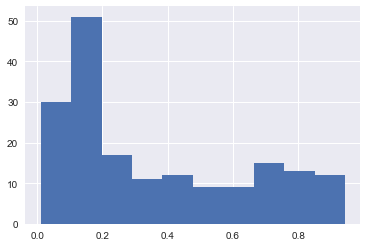

In [40]:
plt.hist(y_pred_prob);

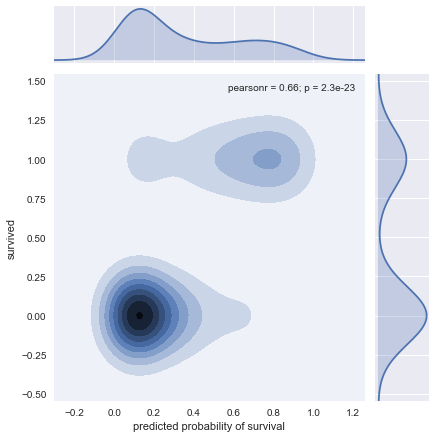

In [41]:
ax = sns.jointplot(y_pred_prob,y_test,kind="kde");
ax.set_axis_labels('predicted probability of survival','survived');

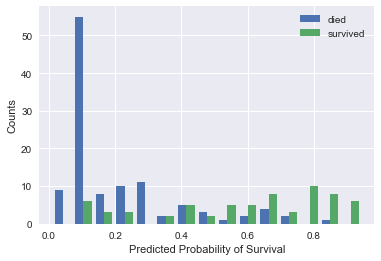

In [42]:
idx0 = y_test == 0
idx1 = y_test == 1
plt.hist([y_pred_prob[idx0], y_pred_prob[idx1]], bins=15);
plt.legend(['died','survived']);
plt.xlabel("Predicted Probability of Survival");
plt.ylabel("Counts");

### Q: How does the performance metrics change if we change threshold?

Try threshold values of 0.2, 0.5, 0.8 and print classification report for each.

In [43]:
thr = 0.2
y_pred = y_pred_prob > thr

In [44]:
print metrics.classification_report(y_test, y_pred, target_names=['Died','Survived'])

             precision    recall  f1-score   support

       Died       0.89      0.64      0.74       113
   Survived       0.58      0.86      0.70        66

avg / total       0.78      0.72      0.72       179



In [45]:
thr = 0.8
y_pred = y_pred_prob > thr

In [46]:
print metrics.classification_report(y_test, y_pred, target_names=['Died','Survived'])

             precision    recall  f1-score   support

       Died       0.70      0.99      0.82       113
   Survived       0.95      0.27      0.42        66

avg / total       0.79      0.73      0.67       179



In [47]:
thr = 0.5
y_pred = y_pred_prob > thr

In [48]:
print metrics.classification_report(y_test, y_pred, target_names=['Died','Survived'])

             precision    recall  f1-score   support

       Died       0.83      0.91      0.87       113
   Survived       0.82      0.68      0.74        66

avg / total       0.83      0.83      0.82       179



### ROC curve

https://en.wikipedia.org/wiki/Receiver_operating_characteristic 

In [49]:
fpr, tpr, thr = metrics.roc_curve(y_test, y_pred_prob)

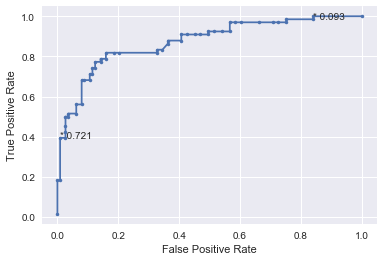

In [51]:
plt.plot(fpr, tpr,'.-');
plt.xlabel("False Positive Rate");
plt.ylabel("True Positive Rate");
plt.text(fpr[3],tpr[3],"* %0.3f"%thr[3])
plt.text(fpr[-3],tpr[-3],"* %0.3f"%thr[-3])

In [52]:
auc = metrics.auc(fpr, tpr)
print "AUC:",auc

AUC: 0.873960847412


### Scatter plot visualization of true and false predictions

In [53]:
from sklearn import decomposition

pca = decomposition.PCA()
X_pca = pca.fit_transform(X)
tst_pca = X_pca[test_idx-1]

o: survived
x: died
red: predicted survived
purple: predicted dead
TP: red O
TN: purple X


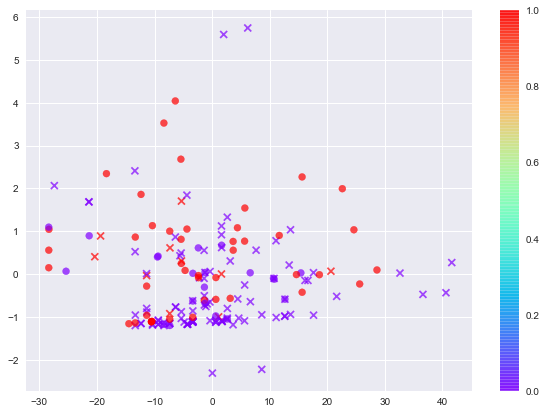

In [54]:
thr = 0.5
y_pred = y_pred_prob > thr
plt.figure(figsize=(10,7))
plt.scatter(tst_pca[y_test==0,0],tst_pca[y_test==0,1], marker='x', c=y_pred[y_test==0], 
            cmap=plt.cm.rainbow, alpha=0.7);
plt.scatter(tst_pca[y_test==1,0],tst_pca[y_test==1,1], marker='o', c=y_pred[y_test==1], 
            cmap=plt.cm.rainbow, alpha=0.7);
plt.colorbar();
print "o: survived"
print "x: died"
print "red: predicted survived"
print "purple: predicted dead"
print "TP: red O"
print "TN: purple X"

### SVM

In [55]:
from sklearn import svm

In [56]:
svm_model = svm.SVC()

In [57]:
svm_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [58]:
y_pred = svm_model.predict(X_test)

In [59]:
print metrics.classification_report(y_test, y_pred, target_names=['Died','Survived'])

             precision    recall  f1-score   support

       Died       0.81      0.89      0.85       113
   Survived       0.78      0.64      0.70        66

avg / total       0.80      0.80      0.79       179



In [63]:
y_pred_score = svm_model.decision_function(X_test)

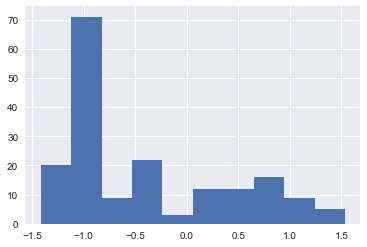

In [66]:
plt.hist(y_pred_score);

In [67]:
y_pred_prob2 = (y_pred_score - min(y_pred_score))/(max(y_pred_score)-min(y_pred_score))

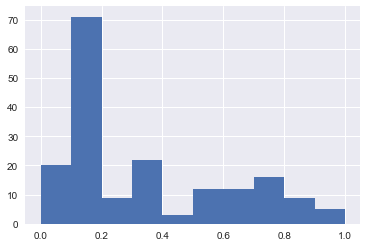

In [68]:
plt.hist(y_pred_prob2);

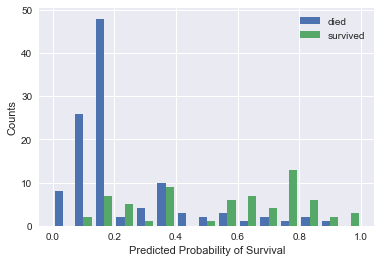

In [69]:
idx0 = y_test == 0
idx1 = y_test == 1
plt.hist([y_pred_prob2[idx0], y_pred_prob2[idx1]], bins=15);
plt.legend(['died','survived']);
plt.xlabel("Predicted Probability of Survival");
plt.ylabel("Counts");

In [70]:
fpr2, tpr2, thr2 = metrics.roc_curve(y_test, y_pred_prob2)

In [71]:
auc2 = metrics.auc(fpr2,tpr2)

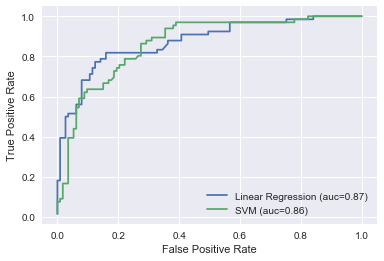

In [72]:
plt.plot(fpr, tpr);
plt.plot(fpr2, tpr2);
plt.xlabel("False Positive Rate");
plt.ylabel("True Positive Rate");

plt.legend(["Linear Regression (auc=%0.2f)"%auc,"SVM (auc=%0.2f)"%auc2]);

In [73]:
print "AUC:",auc2

AUC: 0.864172700456


### Random Forest

### *Q: Create ROC curve for a Random Forest model and compare with the other two.

## Clustering

http://scikit-learn.org/stable/modules/clustering.html

In [75]:
from sklearn import cluster

### Kmeans

In [76]:
km = cluster.KMeans(n_clusters=2, tol=1e-99, max_iter=999, verbose=0)

In [77]:
km.fit(X_train,y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=999,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=1e-99, verbose=0)

In [78]:
y_km = km.fit_predict(X_test)

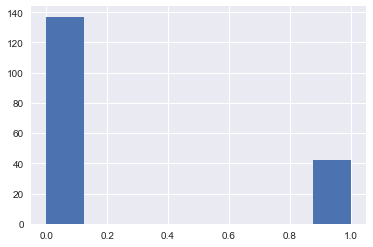

In [79]:
plt.hist(y_km,bins=8);

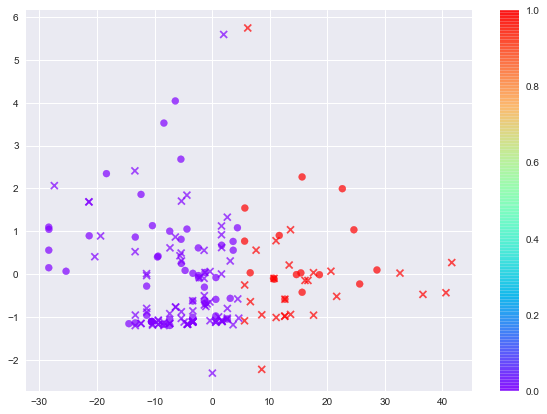

In [80]:
plt.figure(figsize=(10,7))
plt.scatter(tst_pca[y_test==0,0],tst_pca[y_test==0,1], marker='x', c=y_km[y_test==0], cmap=plt.cm.rainbow, alpha=0.7);
plt.scatter(tst_pca[y_test==1,0],tst_pca[y_test==1,1], marker='o', c=y_km[y_test==1], cmap=plt.cm.rainbow, alpha=0.7);
plt.colorbar();

### DBSCAN

In [81]:
dbs = cluster.DBSCAN(1)

In [82]:
y_dbs = dbs.fit_predict(X_test)

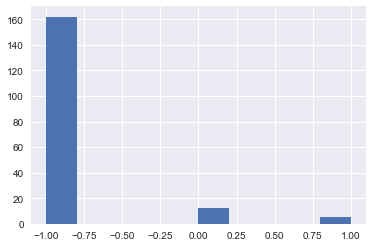

In [83]:
plt.hist(y_dbs);

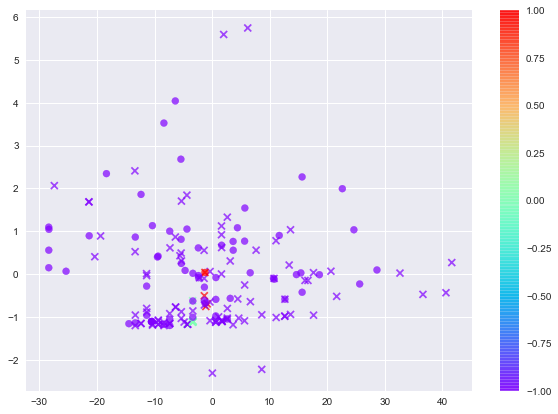

In [84]:
plt.figure(figsize=(10,7))
plt.scatter(tst_pca[y_test==0,0],tst_pca[y_test==0,1], marker='x', c=y_dbs[y_test==0], cmap=plt.cm.rainbow, alpha=0.7);
plt.scatter(tst_pca[y_test==1,0],tst_pca[y_test==1,1], marker='o', c=y_dbs[y_test==1], cmap=plt.cm.rainbow, alpha=0.7);
plt.colorbar();

# Lab 5

In this lab we talk about some advanced topics to improve our predictions.

## Feature Selection

Which feature are more important and which ones are not important?

http://scikit-learn.org/stable/modules/feature_selection.html

In [85]:
from sklearn import feature_selection

### SelectFromModel

In [94]:
mdl = svm.LinearSVC(penalty='l1', dual=False).fit(X_train, y_train)

In [95]:
feature_selector = feature_selection.SelectFromModel(estimator=mdl, prefit=True)

In [96]:
X_train1 = feature_selector.transform(X_train)

In [97]:
pd.DataFrame(X_train1).head()

,0,1,2,3,4,5,6,7,8
0,-0.474279,4.489019,0.136423,0.0,0.0,1.0,0.0,1.0,29.000000
1,-0.474279,-0.473408,-0.879247,1.0,0.0,1.0,0.0,1.0,25.652818
2,0.432550,-0.473408,1.040244,1.0,0.0,0.0,0.0,1.0,42.000000
3,-0.474279,-0.473408,-0.372953,0.0,0.0,1.0,0.0,1.0,30.000000
4,-0.474279,-0.473408,2.017500,1.0,0.0,0.0,0.0,0.0,22.000000


In [98]:
X_train.head()

,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Age
PassengerId,,,,,,,,,
568,-0.474279,4.489019,0.136423,0.0,0.0,1.0,0.0,1.0,29.000000
471,-0.474279,-0.473408,-0.879247,1.0,0.0,1.0,0.0,1.0,25.652818
36,0.432550,-0.473408,1.040244,1.0,0.0,0.0,0.0,1.0,42.000000
80,-0.474279,-0.473408,-0.372953,0.0,0.0,1.0,0.0,1.0,30.000000
374,-0.474279,-0.473408,2.017500,1.0,0.0,0.0,0.0,0.0,22.000000


In [99]:
print "Original number of features:",X_train.shape[1]
print "Selected number of features:",X_train1.shape[1]

Original number of features: 9
Selected number of features: 9


### Recursive Feature Elimination (RFE)

In [100]:
rfe = feature_selection.RFE(estimator=mdl, verbose=1)

In [101]:
rfe.fit(X_train,y_train)

Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.


RFE(estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0),
  n_features_to_select=None, step=1, verbose=1)

In [102]:
sorted(zip(rfe.ranking_, X_train.columns))

[(1, 'Embarked_S'),
 (1, 'Fare'),
 (1, 'Pclass_3'),
 (1, 'Sex_male'),
 (2, 'SibSp'),
 (3, 'Pclass_2'),
 (4, 'Parch'),
 (5, 'Age'),
 (6, 'Embarked_Q')]

## Over-fitting, Under-fitting

In [104]:
train_score = []
test_score = []
c_range = np.logspace(-3,4,50) 
for c in c_range:
    print '.',
    mdl = svm.SVC(C=c)
    mdl.fit(X_train, y_train)
    y_fit = mdl.predict(X_train)
    y_pred = mdl.predict(X_test)
    train_score.append(metrics.f1_score(y_train, y_fit))
    test_score.append(metrics.f1_score(y_test, y_pred))

. . . . . . 

/Users/shahab/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


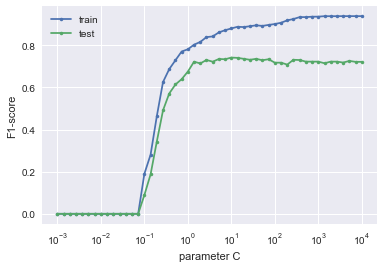

In [106]:
plt.semilogx(c_range[:len(train_score)], train_score,'.-');
plt.semilogx(c_range[:len(train_score)], test_score,'.-');
plt.legend(['train','test'])
plt.xlabel('parameter C')
plt.ylabel('F1-score')

### Q: Given the above graph, what's the best value of C?

In [107]:
#Chan Yu
c_range[:len(train_score)][np.argmax(test_score)]

10.0

In [108]:
best_c = c_range[np.argmax(test_score)]
print "Best C=",best_c
print "Best F1-score:",np.max(test_score)

Best C= 10.0
Best F1-score: 0.74213836478


### Q: Is it ok to use test data for parameter tuning?

It's better to use validation data for parameter tuning.

## Model Selection

### Cross-Validation
http://scikit-learn.org/stable/modules/cross_validation.html

In [109]:
from sklearn import model_selection

In [110]:
mdl = svm.SVC(C=1.0)
scores = model_selection.cross_val_score(mdl, X, y, cv=5, verbose=1, n_jobs=5, scoring="f1")

[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:    0.1s finished


In [112]:
scores

array([ 0.6870229 ,  0.75757576,  0.71875   ,  0.71544715,  0.77419355])

In [111]:
print("Cross-Validated F1-Score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() ))

Cross-Validated F1-Score: 0.73 (+/- 0.03)


### Cross-validation Iterators
#### K-fold

In [116]:
kf = model_selection.KFold(n_splits=5)
mdl = svm.SVC(C=1)

train_score = []
test_score = []
for train_idx, test_idx in kf.split(X):
    print '.',
    X_trn = X.values[train_idx]
    X_tst = X.values[test_idx]
    y_trn = y.values[train_idx]
    y_tst = y.values[test_idx]
    mdl.fit(X_trn, y_trn)
    y_fit = mdl.predict(X_trn)
    y_pred = mdl.predict(X_tst)
    train_score.append(metrics.f1_score(y_trn, y_fit))
    test_score.append(metrics.f1_score(y_tst, y_pred))
   

. . . . .


In [117]:
print("Cross-Validated Train F1-Score: %0.2f (+/- %0.2f)" % (np.mean(train_score), np.std(train_score) ))

Cross-Validated Train F1-Score: 0.80 (+/- 0.02)


In [118]:
print("Cross-Validated Test F1-Score: %0.2f (+/- %0.2f)" % (np.mean(test_score), np.std(test_score) ))

Cross-Validated Test F1-Score: 0.72 (+/- 0.05)


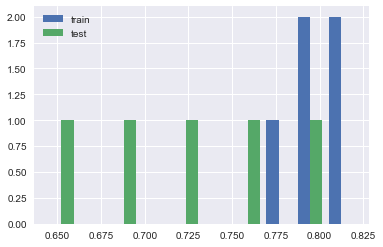

In [119]:
plt.hist([train_score, test_score]);
plt.legend(['train','test']);

#### StratifiedKFold

StratifiedKFold can be used to balance the splits if labels are unbalanced.

In [120]:
kf = model_selection.StratifiedKFold(n_splits=50)
mdl = svm.SVC(C=1)

train_score = []
test_score = []
for train_idx, test_idx in kf.split(X, y):
    print '.',
    X_trn = X.values[train_idx]
    X_tst = X.values[test_idx]
    y_trn = y.values[train_idx]
    y_tst = y.values[test_idx]
    mdl.fit(X_trn, y_trn)
    y_fit = mdl.predict(X_trn)
    y_pred = mdl.predict(X_tst)
    train_score.append(metrics.f1_score(y_trn, y_fit))
    test_score.append(metrics.f1_score(y_tst, y_pred))

. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .


In [121]:
print("Cross-Validated Train F1-Score: %0.2f (+/- %0.2f)" % (np.mean(train_score), np.std(train_score) ))

Cross-Validated Train F1-Score: 0.80 (+/- 0.00)


In [122]:
print("Cross-Validated Test F1-Score: %0.2f (+/- %0.2f)" % (np.mean(test_score), np.std(test_score) ))

Cross-Validated Test F1-Score: 0.73 (+/- 0.12)


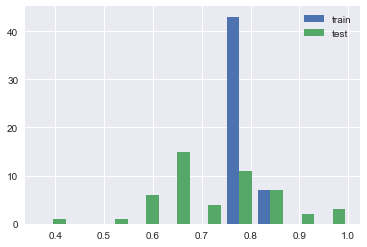

In [123]:
plt.hist([train_score, test_score]);
plt.legend(['train','test']);

### Parameter Tuning
http://scikit-learn.org/stable/modules/grid_search.html

In [124]:
def report(clf):
    print "Best parameters set found on development set:"
    print
    print clf.best_params_
    print
    print "Grid scores on development set:"
    print
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print

    print "Detailed classification report:"
    print
    print "The model is trained on the full development set."
    print "The scores are computed on the full evaluation set."
    print
    y_true, y_pred = y_test, clf.predict(X_test)
    print metrics.classification_report(y_true, y_pred)
    print

#### Exhaustive Grid Search

Tip: split data to development_set (to be fed to the GridSearchCV instance) and an evaluation_set

In [125]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.5, random_state=0)

In [ ]:
#not recommended. takes a long time.
# tuned_parameters = {'kernel': ['rbf','linear'], 'C': [0.1, 1, 10]}
# clf = model_selection.GridSearchCV(svm.SVC(), tuned_parameters, verbose = 2, n_jobs=-1)
# clf.fit(X_train, y_train)
# report(clf)

#### RandomizedSearchCV

In [126]:
tuned_parameters = {'kernel': ['rbf','linear'], 
                    'C': [0.01, 0.1, 1, 10, 100], 
                    'gamma': ['auto',0.01, 1]}

random_search = model_selection.RandomizedSearchCV(svm.SVC(), verbose= 2,
                                                   param_distributions=tuned_parameters, 
                                                   n_iter=3)

random_search.fit(X, y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] kernel=linear, C=0.1, gamma=0.01 ................................
[CV] ................. kernel=linear, C=0.1, gamma=0.01, total=   0.0s
[CV] kernel=linear, C=0.1, gamma=0.01 ................................
[CV] ................. kernel=linear, C=0.1, gamma=0.01, total=   0.0s
[CV] kernel=linear, C=0.1, gamma=0.01 ................................
[CV] ................. kernel=linear, C=0.1, gamma=0.01, total=   0.0s
[CV] kernel=linear, C=100, gamma=0.01 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................. kernel=linear, C=100, gamma=0.01, total=  12.8s
[CV] kernel=linear, C=100, gamma=0.01 ................................
[CV] ................. kernel=linear, C=100, gamma=0.01, total=  13.9s
[CV] kernel=linear, C=100, gamma=0.01 ................................
[CV] ................. kernel=linear, C=100, gamma=0.01, total=  26.9s
[CV] kernel=linear, C=10, gamma=auto .................................
[CV] .................. kernel=linear, C=10, gamma=auto, total=   1.4s
[CV] kernel=linear, C=10, gamma=auto .................................
[CV] .................. kernel=linear, C=10, gamma=auto, total=   2.0s
[CV] kernel=linear, C=10, gamma=auto .................................
[CV] .................. kernel=linear, C=10, gamma=auto, total=  19.4s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.3min finished


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params={}, iid=True, n_iter=3, n_jobs=1,
          param_distributions={'kernel': ['rbf', 'linear'], 'C': [0.01, 0.1, 1, 10, 100], 'gamma': ['auto', 0.01, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [127]:
report(random_search)

Best parameters set found on development set:

{'kernel': 'linear', 'C': 0.1, 'gamma': 0.01}

Grid scores on development set:

0.788 (+/-0.025) for {'kernel': 'linear', 'C': 0.1, 'gamma': 0.01}
0.788 (+/-0.025) for {'kernel': 'linear', 'C': 100, 'gamma': 0.01}
0.788 (+/-0.025) for {'kernel': 'linear', 'C': 10, 'gamma': 'auto'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

             precision    recall  f1-score   support

          0       0.82      0.84      0.83       283
          1       0.71      0.69      0.70       163

avg / total       0.78      0.78      0.78       446




## Pipeline

In [128]:
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

In [129]:
clf = linear_model.LogisticRegression()
sc = preprocessing.StandardScaler()
pipe_model = Pipeline([('scaler', sc), ('lr', clf)])
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [130]:
y_pred = pipe_model.predict(X_test)

In [131]:
print metrics.classification_report(y_test,y_pred)

             precision    recall  f1-score   support

          0       0.83      0.83      0.83       283
          1       0.71      0.71      0.71       163

avg / total       0.78      0.78      0.78       446



### Q: Why use pipelines?